In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
#read in data
df = pd.read_csv("/content/car_sales_data.csv")



In [ ]:
print("Shape:", df.shape)
print("\nColumns & dtypes:\n", df.dtypes)

Shape: (50000, 7)

Columns & dtypes:
 Manufacturer            object
Model                   object
Engine size            float64
Fuel type               object
Year of manufacture      int64
Mileage                  int64
Price                    int64
dtype: object


In [18]:
#check missing values per column
print("\nMissing values per column:\n", df.isna().sum())


Missing values per column:
 Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64


In [25]:
#check duplicates
print("Total duplicates:", df.duplicated().sum())


duplicates = df[df.duplicated()] #display all duplicate rows
print(duplicates)


Total duplicates: 12
      Manufacturer   Model  Engine size Fuel type  Year of manufacture  \
5426            VW    Polo          1.2    Petrol                 2003   
9862          Ford  Mondeo          1.4    Diesel                 1987   
14745          BMW      Z4          2.4    Petrol                 1999   
19020       Toyota   Yaris          1.0    Petrol                 1996   
19337           VW    Polo          1.0    Petrol                 2000   
23927           VW    Polo          1.2    Petrol                 2021   
25368           VW    Golf          1.2    Diesel                 2011   
28576           VW    Polo          1.2    Petrol                 2003   
34246           VW  Passat          2.0    Diesel                 2003   
35647         Ford   Focus          1.6    Petrol                 2019   
41536           VW  Passat          1.8    Diesel                 1996   
45904         Ford  Fiesta          1.2    Petrol                 2003   

       Mileage  

In [26]:
"Duplicates"

#drop duplicates
df = df.drop_duplicates()

print("After dropping exact duplicates:", df.shape)


After dropping exact duplicates: (49988, 7)


Cars per manufacturer:
              Count  Percentage
Manufacturer                   
Ford          14956       29.92
VW            14906       29.82
Toyota        12553       25.11
BMW            4964        9.93
Porsche        2609        5.22


/tmp/ipython-input-4186761848.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


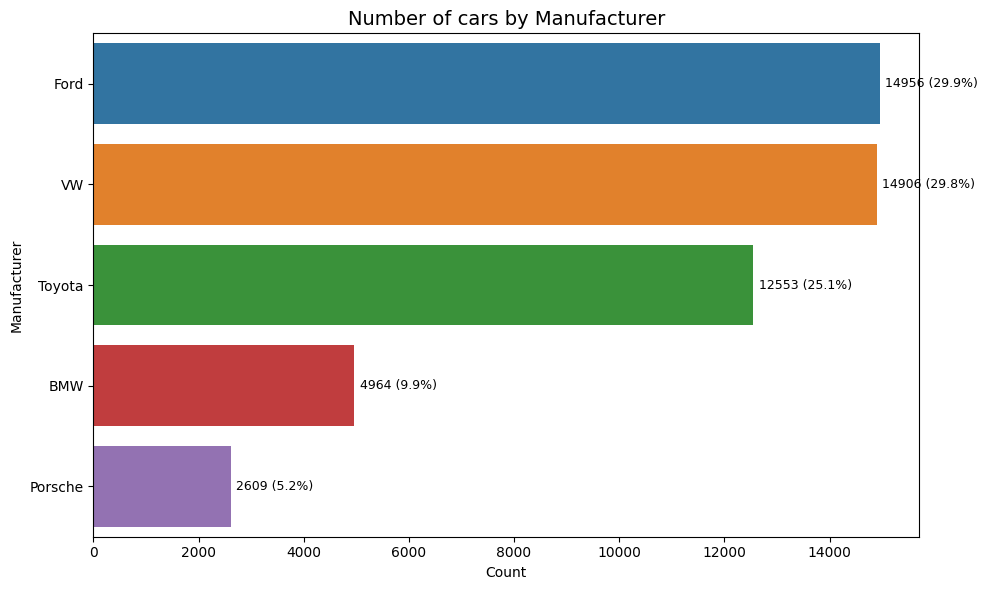

In [49]:
"Number and percentage of every manufacturer"

# Group by manufacturer and count
counts = df["Manufacturer"].value_counts()

counts_df = counts.rename("Count").to_frame()
counts_df["Percentage"] = (counts_df["Count"] / counts_df["Count"].sum() * 100).round(2)

print("Cars per manufacturer:")
print(counts_df)

#plot
plt.figure(figsize=(10,6))
palette = sns.color_palette("tab10", n_colors=len(counts_df))

sns.barplot(
    y=counts_df.index,
    x=counts_df["Count"],
    palette=palette
)

plt.title("Number of cars by Manufacturer", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Manufacturer")

for i, (count, pct) in enumerate(zip(counts_df["Count"], counts_df["Percentage"])):
    plt.text(count + 100, i, f"{count} ({pct:.1f}%)",
             ha="left", va="center", fontsize=9)

plt.tight_layout()
plt.show()



Sorted with percentages:

Manufacturer      Model  count  percentage
         BMW         Z4   1687       33.98
         BMW         M5   1645       33.14
         BMW         X3   1632       32.88
        Ford     Mondeo   5057       33.81
        Ford      Focus   4975       33.26
        Ford     Fiesta   4924       32.92
     Porsche        911    872       33.42
     Porsche    Cayenne    870       33.35
     Porsche 718 Cayman    867       33.23
      Toyota       RAV4   4292       34.19
      Toyota      Prius   4171       33.23
      Toyota      Yaris   4090       32.58
          VW       Golf   5049       33.87
          VW       Polo   4988       33.46
          VW     Passat   4869       32.66


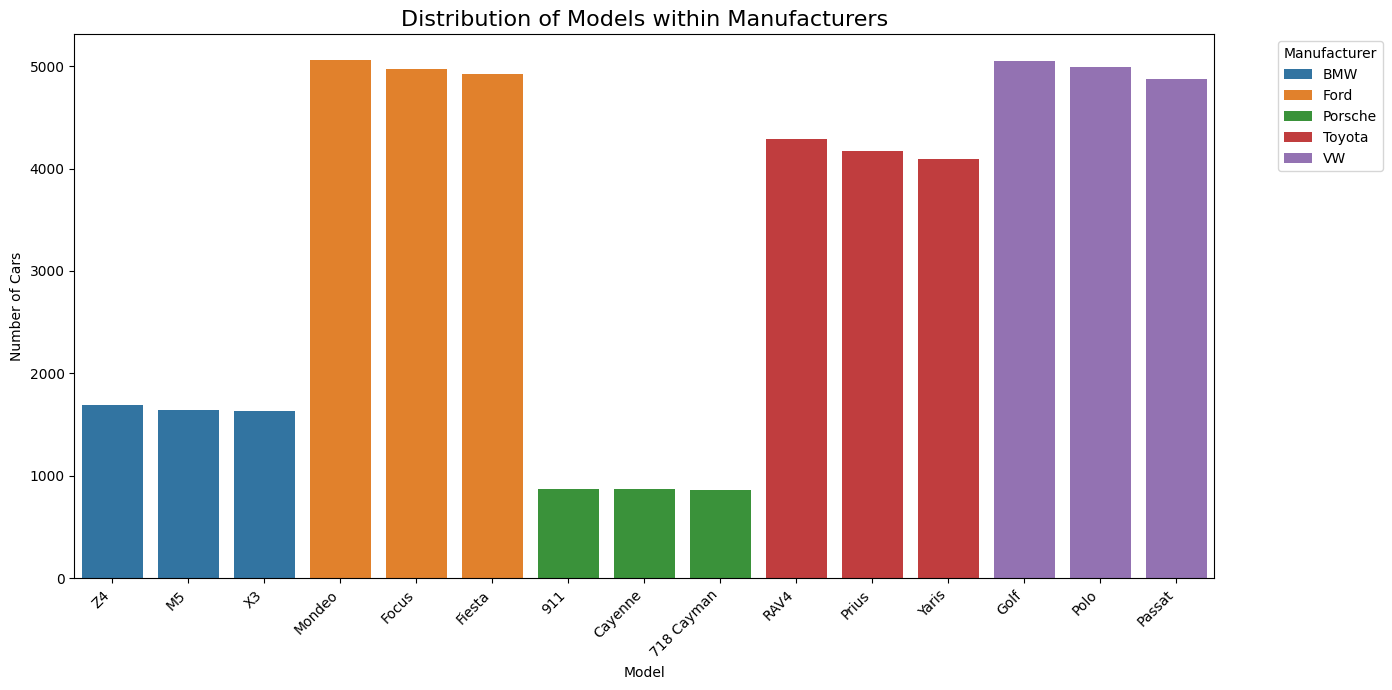

In [50]:
"Number and percentage of every model"

#Group by Manufacturer and Model
brand_model_counts = (
    df.groupby(["Manufacturer", "Model"])
      .size()
      .reset_index(name="count")
)

brand_model_counts["percentage"] = (
    brand_model_counts
    .groupby("Manufacturer")["count"]
    .transform(lambda x: (x / x.sum() * 100).round(2))
)

#Sort by manufacturer
brand_model_counts = brand_model_counts.sort_values(
    ["Manufacturer", "count"], ascending=[True, False]
).reset_index(drop=True)

print("\nSorted with percentages:\n")
print(brand_model_counts.to_string(index=False))

#Plot
plt.figure(figsize=(14, 7))
sns.barplot(
    data=brand_model_counts,
    x="Model",
    y="count",
    hue="Manufacturer",
    dodge=False,
    palette="tab10"
)
plt.title("Distribution of Models within Manufacturers", fontsize=16)
plt.ylabel("Number of Cars")
plt.xlabel("Model")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [59]:
#identify numeric and categorical values
num_df = df.select_dtypes(include=[np.number]).columns.tolist()
cat_df = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
print("\nNumeric columns:", num_df)
print("Categorical columns:", cat_df)



Numeric columns: ['Engine size', 'Year of manufacture', 'Mileage', 'Price']
Categorical columns: ['Manufacturer', 'Model', 'Fuel type']


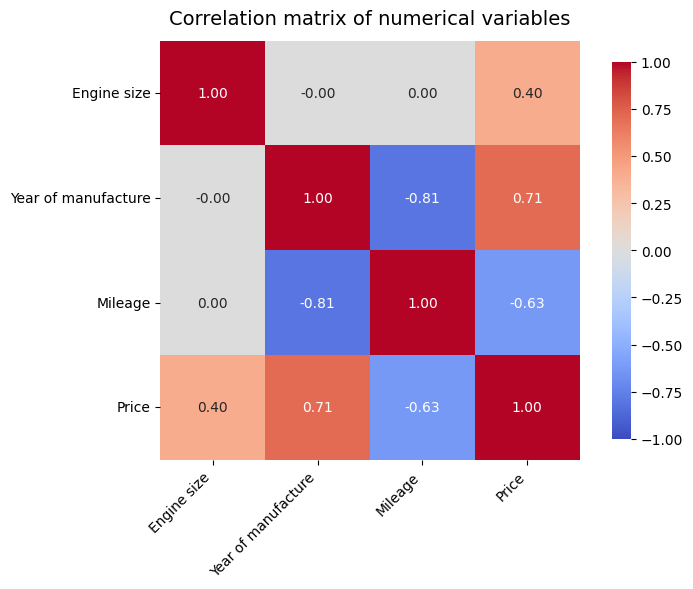

In [60]:
"Correlation matrix of numerical fuetures"

#only numeric columns
num_df = df.select_dtypes(include=[np.number])

corr = num_df.corr(method="pearson").round(2)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    corr,
    annot=True, fmt=".2f",
    cmap="coolwarm", vmin=-1, vmax=1,
    square=True,
    cbar_kws={"shrink": 0.9}
)
ax.set_title("Correlation matrix of numerical variables", fontsize=14, pad=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [62]:


# --- Helper: IQR bounds ---
def iqr_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

# --- Outlier detection ---
def detect_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outlier_flags = pd.DataFrame(index=df.index)
    summary = []

    for col in numeric_cols:
        s = df[col].dropna()

        # IQR
        lower, upper = iqr_bounds(s)
        iqr_flag = (df[col] < lower) | (df[col] > upper)
        outlier_flags[f"{col}_outlier_iqr"] = iqr_flag

        # Z-score
        mean, std = df[col].mean(), df[col].std()
        if std > 0:
            z_flag = ((df[col] - mean).abs() / std) > 3
        else:
            z_flag = pd.Series(False, index=df.index)
        outlier_flags[f"{col}_outlier_z"] = z_flag

        # Summary row
        summary.append({
            "column": col,
            "iqr_outliers": int(iqr_flag.sum()),
            "z_outliers": int(z_flag.sum()),
            "total_rows": len(df),
        })

    # Combined flag
    outlier_flags["is_outlier_any"] = outlier_flags.any(axis=1)

    return outlier_flags, pd.DataFrame(summary)

# --- Run on your data ---
outlier_flags, summary = detect_outliers(df)

# Merge flags into your dataframe
df_with_outliers = df.join(outlier_flags)

print("Outlier summary per column:")
print(summary)

# Show top 10 rows with the most flags
df_with_outliers[df_with_outliers["is_outlier_any"]].head(10)


Outlier summary per column:
                column  iqr_outliers  z_outliers  total_rows
0          Engine size          3951        2176       50000
1  Year of manufacture             0           0       50000
2              Mileage           385         237       50000
3                Price          2649         910       50000


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Engine size_outlier_iqr,Engine size_outlier_z,Year of manufacture_outlier_iqr,Year of manufacture_outlier_z,Mileage_outlier_iqr,Mileage_outlier_z,Price_outlier_iqr,Price_outlier_z,is_outlier_any
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704,True,True,False,False,False,False,True,False,True
18,Toyota,RAV4,2.0,Hybrid,2018,28381,52671,False,False,False,False,False,False,True,False,True
26,Porsche,911,3.5,Petrol,2005,151556,19747,True,False,False,False,False,False,False,False,True
41,BMW,M5,4.0,Petrol,2017,22759,97758,True,True,False,False,False,False,True,True,True
51,Toyota,RAV4,2.4,Petrol,2018,24588,49125,False,False,False,False,False,False,True,False,True
57,Porsche,Cayenne,2.6,Diesel,2015,33693,54037,False,False,False,False,False,False,True,False,True
81,Porsche,718 Cayman,2.4,Petrol,2021,14070,69526,False,False,False,False,False,False,True,True,True
85,Toyota,Prius,1.0,Hybrid,1993,333629,478,False,False,False,False,True,True,False,False,True
99,BMW,M5,4.4,Petrol,1987,226046,2956,True,True,False,False,False,False,False,False,True
101,BMW,M5,4.4,Petrol,2008,109941,31711,True,True,False,False,False,False,False,False,True
